Водопьян А.О. Хабибуллин Р.А. 2019 г. 

# Z - фактор

Импорт необходимых модулей

In [4]:
import sys
sys.path.append('../')
import uniflocpy.uPVT.PVT_fluids as PVT
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
import pandas as pd
import pylab
import uniflocpy.uPVT.PVT_correlations as PVTcorr
%matplotlib inline


Сравнение экспериментального графика Стендинга-Каци и уравнения Дранчука и Абу-Кассема

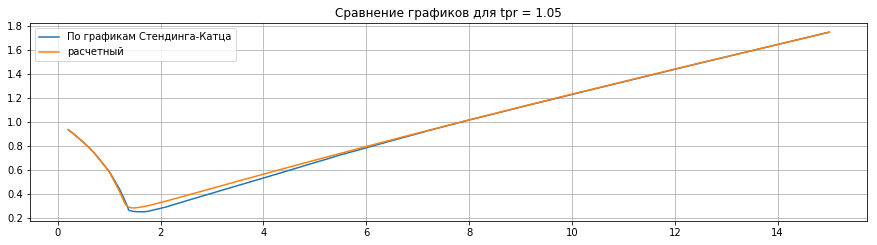

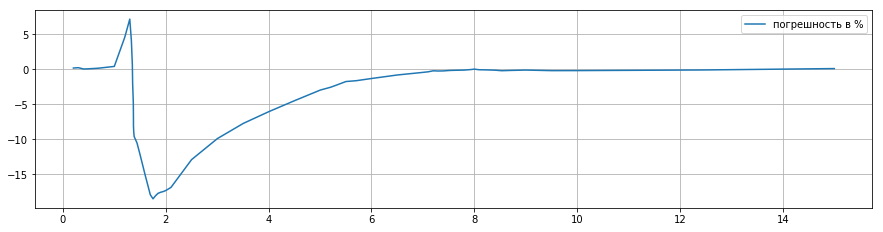

In [13]:
def get_z_curve_StandingKatz(tpr):
    """
    Функция позволяет считать данные из нужного файла в зависимости от входного tpr и построить график
    Допустимые значения tpr = 1.05, 1.1, 1.2, 1.3, 1.4, 1.5, 1.6, 1.7, 1.8, 1.9, 2, 2.2, 2.4, 2.6, 2.8, 3
    :param tpr: температура приведенная
    :return: данные из графика Cтендинга для этой температуры
    """
    data = pd.read_csv('data\Standing-Katz Chart Data\sk_tpr_{}.txt'.format(int(tpr*100)), sep=';')
    ppr = np.array(pd.DataFrame(data)['x'])
    z = np.array(pd.DataFrame(data)['y'])
    return ppr, z


# Сравним расчетный график с графиком Стендинга
tpr = 1.05
ppr, z = get_z_curve_StandingKatz(tpr)
z_calc = []
pogr = []
i = 0
for p in ppr:
    z_calc.append(PVTcorr.unf_zfactor_DAK_ppr(p, tpr))
    pogr.append((z[i]-z_calc[i])/z[i] * 100)
    i += 1

pylab.figure(figsize=(15,8))
pylab.subplot(211)
pylab.plot(ppr, z, label='По графикам Стендинга-Катца')
pylab.plot(ppr, z_calc, label='расчетный')
pylab.title('Сравнение графиков для tpr = {}'.format(tpr))
pylab.grid()
pylab.legend()
pylab.figure(figsize=(15,8))
pylab.subplot(212)
pylab.plot(ppr, pogr, label='погрешность в %')
pylab.grid()
pylab.legend()
pylab.show()

График Стендинга-Каца

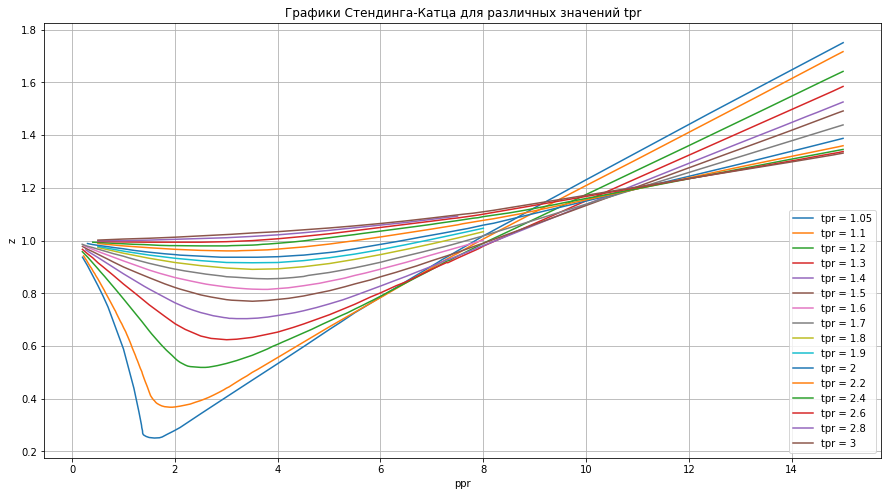

In [11]:
# построим все графики Стендинга сразу
tpr = [1.05, 1.1, 1.2, 1.3, 1.4, 1.5, 1.6, 1.7, 1.8, 1.9, 2, 2.2, 2.4, 2.6, 2.8, 3]
pylab.figure(figsize=(15,8))
for t in tpr:    
    ppr_standing, z_standing = get_z_curve_StandingKatz(t)
    pylab.plot(ppr_standing, z_standing, label='tpr = {}'.format(t))
pylab.grid()
pylab.title('Графики Стендинга-Катца для различных значений tpr')
pylab.legend()
pylab.xlabel('ppr')
pylab.ylabel('z')
pylab.show()